In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Mam Hafiza Maria Data Analysis/Datasets/T20Matches.csv')
df.head()

,Team,Score,Overs,RPO,Inns,Result,Opposition,Ground,Start Date
0,Australia,214/5,20.0,10.7,1,won,v New Zealand,Auckland,17-Feb-05
1,New Zealand,170,20.0,8.5,2,lost,v Australia,Auckland,17-Feb-05
2,England,179/8,20.0,8.95,1,won,v Australia,Southampton,13-Jun-05
3,Australia,79,14.3,5.44,2,lost,v England,Southampton,13-Jun-05
4,South Africa,133,19.3,6.82,1,lost,v New Zealand,Johannesburg,21-Oct-05


# Clean the data here Firstly

In [ ]:
df.columns

Index(['Team', 'Score', 'Overs', 'RPO', 'Inns', 'Result', 'Opposition',
       'Ground', 'Start Date'],
      dtype='object')

In [ ]:
col = ['Team', 'Score', 'Overs', 'RPO', 'Inns', 'Result', 'Opposition',
       'Ground', 'Start Date']

In [ ]:
df.shape

(2328, 9)

In [ ]:
df.isnull().sum()

Team          0
Score         0
Overs         0
RPO           0
Inns          0
Result        0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [ ]:
df.replace("n/r",np.nan,inplace=True)

In [ ]:
df.replace("-",np.nan,inplace=True)

In [ ]:
df.isnull().sum()

Team           0
Score          0
Overs          0
RPO           27
Inns           0
Result        60
Opposition     0
Ground         0
Start Date     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        2328 non-null   object 
 1   Score       2328 non-null   object 
 2   Overs       2328 non-null   float64
 3   RPO         2301 non-null   object 
 4   Inns        2328 non-null   int64  
 5   Result      2268 non-null   object 
 6   Opposition  2328 non-null   object 
 7   Ground      2328 non-null   object 
 8   Start Date  2328 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 163.8+ KB


In [ ]:
df.replace("won",np.abs(2),inplace=True)
df.replace("lost",np.abs(0),inplace=True)
df.replace("tied",np.abs(1),inplace=True)

In [ ]:
df['Result']

0       2.0
1       0.0
2       2.0
3       0.0
4       0.0
       ... 
2323    2.0
2324    0.0
2325    2.0
2326    0.0
2327    2.0
Name: Result, Length: 2328, dtype: float64

In [ ]:
df['RPO']=df['RPO'].astype(float)
df['Inns']=df['Inns'].astype(float)

In [ ]:
df.dtypes

Team           object
Score          object
Overs         float64
RPO           float64
Inns          float64
Result        float64
Opposition     object
Ground         object
Start Date     object
dtype: object

#Finally We get a numeric Data frame here

In [ ]:
num = ["Overs","RPO","Inns","Result"]

num_df = df[num].copy()
num_df.head()

,Overs,RPO,Inns,Result
0,20.0,10.70,1.0,2.0
1,20.0,8.50,2.0,0.0
2,20.0,8.95,1.0,2.0
3,14.3,5.44,2.0,0.0
4,19.3,6.82,1.0,0.0


In [ ]:
num_df.fillna(num_df.mean(),inplace=True)

In [ ]:
num_df.dtypes

Overs     float64
RPO       float64
Inns      float64
Result    float64
dtype: object

In [ ]:
feature_df = num_df[['Overs', 'RPO', 'Inns']]
X = np.asarray(feature_df)
X[0:5]

array([[20.  , 10.7 ,  1.  ],
       [20.  ,  8.5 ,  2.  ],
       [20.  ,  8.95,  1.  ],
       [14.3 ,  5.44,  2.  ],
       [19.3 ,  6.82,  1.  ]])

In [ ]:
num_df['Result'] = num_df['Result'].astype('float')
y = np.asarray(num_df['Result'])
y [0:5]

array([2., 0., 2., 0., 0.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1862, 3) (1862,)
Test set: (466, 3) (466,)


In [ ]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

y_testtrans = lab.fit_transform(y_test)

#view transformed values
print(y_transformed)

[2 2 0 ... 2 2 0]


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_transformed) 

SVC()

In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Erorr occur

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       215
           1       1.00      0.15      0.26        20
           2       0.73      0.68      0.70       231

    accuracy                           0.70       466
   macro avg       0.80      0.53      0.56       466
weighted avg       0.71      0.70      0.69       466

Confusion matrix, without normalization
[[157   0]
 [  0   0]]


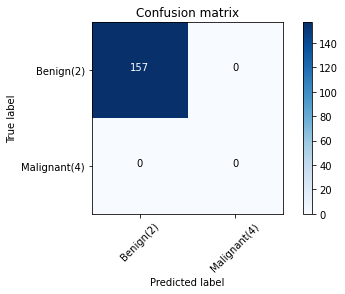

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testtrans, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_testtrans, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_testtrans, yhat, average='weighted')

0.6909613995329427